<a href="https://colab.research.google.com/github/tomat8jpg/hi-c/blob/main/Hi_C_analysis_Taran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Практическая часть/дз

Дедлайн - 20 декабря. Высылать на почту kononkova@gmail.com. Тема письма HSE_HiC_2022.

Значительная часть Д/З основана на готовых (и замечательных) ноутбуках с сайта https://cooltools.readthedocs.io/en/latest/index.html

Там вы сможете найти много дополнительной полезной информации и кода!

Поменяйте пути к файлам в ноутбуках на актуальные.

Д/з состоит из четырех частей:

Отчет должен состоять из картинок и описания к ним.

1) Получение матрицы контактов из ридов (на примере данных для бактерии PAO1).
   В директории data_for_HiC_HSE лежат fastq-файлы после тримминга с помощью cutadapt, референсный геном (PAO1_inverted_727667_4788573.fa) и файл с размером хромосомы (PAO1_inverted_727667_4788573.chrom.sizes).
   Цель задания - получить Hi-C карту для PAO1.
   Включите в отчет картинку получившейся карты (отрисовка полученной матрицы любым удобным способом в питоне) для 2х вариантов: до итеративной коррекции и после. Сравните их. Опишите итеративно-корректированную карту Hi-C, какие характерные для бактерий особенности можно наблюдать на полученной карте ?
  
2) Детекция границ с помощью метода insulation из инструмента cooltools. 
   Для готовой Hi-C карты HiC_hESC_merged.hg38.mapq_30.10000.mcool (250kb) определите и визуализируйте границы.
   Получите таблицу с информацией о значении Insulation score и детектированными границами для трех вариантов окна (см ноутбук) и двух разрешений - 20000 и 40000. Визуализируйте границы вместе с картой предложенными в ноутбуке методами.
   Оцените разметку для перечисленных вариантов. Какую бы вы выбрали для дальнейшего анализа? Стоит ли, по вашему мнению, включать в финальную разметку слабые границы?

3) Детекция петель.
Получите разметку петель 2 инструментами (cooltools и mustache) для хромосомы 1 и разрешения 20kb.
Сравните кол-во петель, полученное двумя способами. Отрисуйте средние хитмэпы вокруг полученных петель и определите, какой инструмент дает более яркий паттерн для "средней петли". Какой инструмент вы бы предпочли для дальнейшей работы?
Отрисованные средние хитмэпы и комментарии включите в отчет. Средние хитмэпы получают следующим образом: для каждой петли "вырезаем" из карты контактов квадратный участок размера 21 на 21 (естественно, можно и 10 на 10, и 100 на 100 - на ваше усмотрение), в центре которого располагается петля (яркая точка на карте контактов). Очевидно, это вырезание осуществляется обычным slicing of numpy array для матрицы хромосомы 1. Подгружается эта матрица уже известным способом: clr.matrix(balance=True).fetch('chr1'), где clr - cool- файл, подгруженный с помощью комманды cooler.Cooler(path_to_mcool_file::resolutions/20000). Таких квадратных участков получается столько же, сколько петель. Их нужно усреднить по всем петлям, т е на выходе у вас также будет матрица размера 21 на 21. Поскольку в матрице контактов содержатся значения NaN, нужно использовать np.nanmean().

4) Получение разметки компартментов и построение saddle plot. Для двух организмов (мушка и человек) выберете какую-нибудь хромосому*, получите первый собственный вектор, характеризующий принадлежность к компартментам, и постройте saddle plot (просто отрисуйте полученную матрицу любым способом в питоне). Опишите, что отображено на saddle plot и какие различия в структуре компартментов наблюдаются у мушки и человека. 
Данные: 
Bg3_merged.dm3.mapq_30.1000.mcool (разрешение 20kb) - нервная ткань (Drosophila)
HiC_hESC_merged.hg38.mapq_30.10000.mcool (разрешение 250kb) - hESC (человек)
Для определения первого собственного вектора вам понадобится геном человека и плодовой мушки (hg38.fa и dm3.fa). Загрузите его самостоятельно на свой гугл-диск.

*Название хромосом в cool-файле смотрят следующим образом: clr.chromnames, где clr - cool/mcool - файл, подгруженный с помощью комманды cooler.Cooler(...)

Для отчета приложите картинки с комментариями.

Read the https://pairtools.readthedocs.io/en/latest/ and https://cooler.readthedocs.io/en/latest/index.html
for more information

PART I: read mapping and Hi-C map creation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()


⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:20
🔁 Restarting kernel...


In [ ]:
!cd /content/drive/MyDrive/data_for_HiC_HSE

In [ ]:
!cp -R /content/drive/MyDrive/data_for_HiC_HSE /content/

In [ ]:
!mkdir /content/task1

In [ ]:
!mv /content/data_for_HiC_HSE/HiC_PAO1_R1_001_cutadapt_cut_cor.fastq.gz /content/task1
!mv /content/data_for_HiC_HSE/HiC_PAO1_R2_001_cutadapt_cut_cor.fastq.gz /content/task1
!mv /content/data_for_HiC_HSE/PAO1_inverted_727667_4788573.chrom.sizes /content/task1
!mv /content/data_for_HiC_HSE/PAO1_inverted_727667_4788573.fa /content/task1

In [ ]:
%%bash 
pip install numpy pysam cython
pip install pairtools
conda install -c bioconda bwa
conda install -c bioconda samtools
pip install cooler
pip  install pysam


In [ ]:
import pysam

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import bioframe

In [ ]:
import cooler

In [ ]:
! bwa index /content/task1/PAO1_inverted_727667_4788573.fa

[bwa_index] Pack FASTA... 0.06 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 3.45 seconds elapse.
[bwa_index] Update BWT... 0.06 sec
[bwa_index] Pack forward-only FASTA... 0.05 sec
[bwa_index] Construct SA from BWT and Occ... 1.35 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index /content/task1/PAO1_inverted_727667_4788573.fa
[main] Real time: 5.216 sec; CPU: 4.982 sec


In [ ]:
!cd /content/task1

In [ ]:
! bwa mem -t 5 -SP /content/task1/PAO1_inverted_727667_4788573.fa /content/task1/HiC_PAO1_R1_001_cutadapt_cut_cor.fastq.gz /content/task1/HiC_PAO1_R2_001_cutadapt_cut_cor.fastq.gz | samtools view -Sb  > HiC_PAO.bam

In [ ]:
! pairtools parse -o PAO.pairs.gz -c /content/task1/PAO1_inverted_727667_4788573.chrom.sizes --drop-sam --drop-seq --add-columns mapq HiC_PAO.bam

[E::idx_find_and_load] Could not retrieve index file for 'HiC_PAO.bam'


In [ ]:
! pairtools sort --nproc 5 -o PAO.sorted.pairs.gz  PAO.pairs.gz 

tcmalloc: large alloc 2147491840 bytes == 0x558ba5514000 @  0x7f46cdd251e7 0x558ba4806718 0x558ba48055a1 0x7f46cd703c87 0x558ba480602a


In [ ]:
#let's look at the info stored in the file columns: 
! gzip -dc  /content/PAO.sorted.pairs.gz| grep "#" | tail -n 5

In [ ]:
! gzip -dc PAO.sorted.pairs.gz| grep -v "#" | head -n 5

In [ ]:
%%bash
pairtools dedup \
    --max-mismatch 3 \
    --mark-dups \
    --output \
        >( pairtools split \
            --output-pairs PAO.nodups.pairs.gz \
            --output-sam PAO.nodups.bam \
         ) \
    --output-unmapped \
        >( pairtools split \
            --output-pairs PAO.unmapped.pairs.gz \
            --output-sam PAO.unmapped.bam \
         ) \
    --output-dups \
        >( pairtools split \
            --output-pairs PAO.dups.pairs.gz \
            --output-sam PAO.dups.bam \
         ) \
    --output-stats PAO.dedup.stats \
      PAO.sorted.pairs.gz

In [ ]:
! cooler cload pairs -c1 2 -p1 3 -c2 4 -p2 5 /content/task1/PAO1_inverted_727667_4788573.chrom.sizes:2000 PAO.nodups.pairs.gz PAO.2000.cool

In [ ]:
! cooler zoomify --balance -r 1000,2000 PAO.2000.cool

In [ ]:
c=cooler.Cooler('/content/PAO.2000.cool')

In [ ]:
c.info

{'bin-size': 2000,
 'bin-type': 'fixed',
 'creation-date': '2022-12-18T12:01:04.262221',
 'format': 'HDF5::Cooler',
 'format-url': 'https://github.com/open2c/cooler',
 'format-version': 3,
 'generated-by': 'cooler-0.8.11',
 'genome-assembly': 'unknown',
 'metadata': {},
 'nbins': 3133,
 'nchroms': 1,
 'nnz': 1838467,
 'storage-mode': 'symmetric-upper',
 'sum': 4697591}

In [ ]:
!cooler balance /content/PAO.2000.cool

Traceback (most recent call last):
  File "/usr/local/bin/cooler", line 10, in <module>
    sys.exit(cli())
  File "/usr/local/lib/python3.8/site-packages/click/core.py", line 1130, in __call__
    return self.main(*args, **kwargs)
  File "/usr/local/lib/python3.8/site-packages/click/core.py", line 1055, in main
    rv = self.invoke(ctx)
  File "/usr/local/lib/python3.8/site-packages/click/core.py", line 1657, in invoke
    return _process_result(sub_ctx.command.invoke(sub_ctx))
  File "/usr/local/lib/python3.8/site-packages/click/core.py", line 1404, in invoke
    return ctx.invoke(self.callback, **ctx.params)
  File "/usr/local/lib/python3.8/site-packages/click/core.py", line 760, in invoke
    return __callback(*args, **kwargs)
  File "/usr/local/lib/python3.8/site-packages/cooler/cli/balance.py", line 162, in balance
    with h5py.File(cool_path, 'r+') as h5:
  File "/usr/local/lib/python3.8/site-packages/h5py/_hl/files.py", line 533, in __init__
    fid = make_fid(name, mode, user

In [ ]:
import numpy as np


In [ ]:
import seaborn as sns

In [ ]:
mat=c.matrix(balance=True).fetch('chr1:1-100000')
mat_raw=c.matrix(balance=False).fetch('chr1:1-100000')

logmat = np.log(mat)
logmat_raw = np.log(mat_raw)

FileNotFoundError: ignored

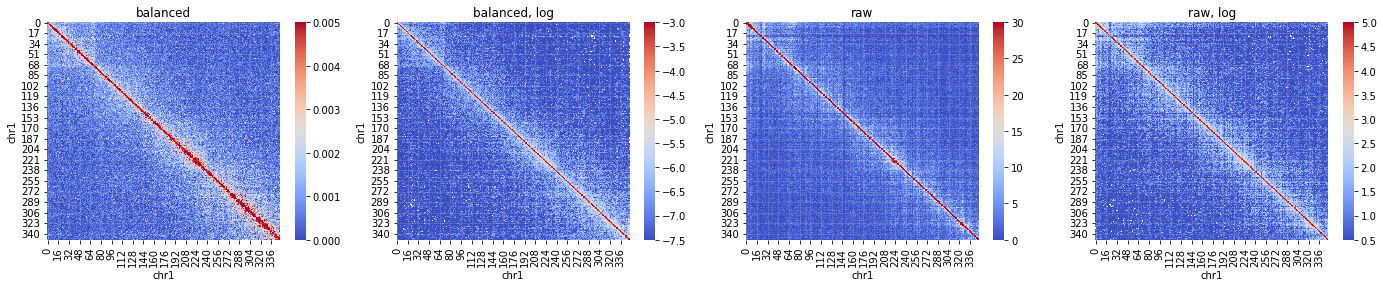

In [ ]:
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(24, 4))

sns.heatmap(mat, cmap ='coolwarm', vmin = 0, vmax = 0.005, ax=axes[0])
axes[0].set_xlabel("chr1")
axes[0].set_ylabel("chr1")
axes[0].set_title('balanced')
axes[0].grid(alpha=0.3)

sns.heatmap(logmat, cmap ='coolwarm', vmin = -7.5, vmax = -3, ax=axes[1])
axes[1].set_xlabel("chr1")
axes[1].set_ylabel("chr1")
axes[1].set_title('balanced, log')
axes[1].grid(alpha=0.3)

sns.heatmap(mat_raw, cmap ='coolwarm', vmin = 0, vmax = 30, ax=axes[2])
axes[2].set_xlabel("chr1")
axes[2].set_ylabel("chr1")
axes[2].set_title('raw')
axes[2].grid(alpha=0.3)

sns.heatmap(logmat_raw, cmap ='coolwarm', vmin = 0.5, vmax = 5, ax=axes[3])
axes[3].set_xlabel("chr1")
axes[3].set_ylabel("chr1")
axes[3].set_title('raw, log')
axes[3].grid(alpha=0.3)


In [ ]:
m=c.matrix(balance=True).fetch('chr1:1-1000000')
m_raw=c.matrix(balance=False).fetch('chr1:1-1000000')

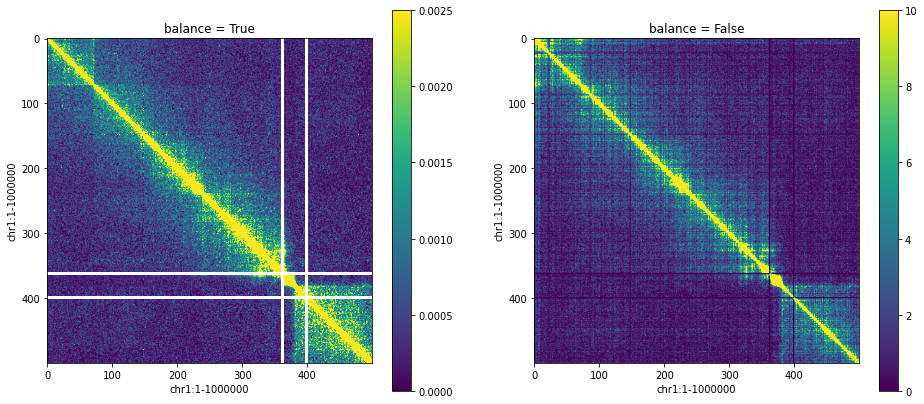

In [ ]:
plt.figure(figsize=(16,7))
ax = plt.subplot(121)
plt.imshow(m, vmin = 0, vmax = 0.0025)
plt.xlabel("chr1:1-1000000")
plt.ylabel("chr1:1-1000000")
plt.title('balance = True')
plt.colorbar()
plt.subplot(122, sharex=ax, sharey=ax)
plt.imshow(m_raw, vmin = 0, vmax = 10)
plt.xlabel("chr1:1-1000000")
plt.ylabel("chr1:1-1000000")
plt.title('balance = False')
plt.colorbar()

<ipython-input-148-2dd148527f37>:3: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(m))
<ipython-input-148-2dd148527f37>:9: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(m_raw))


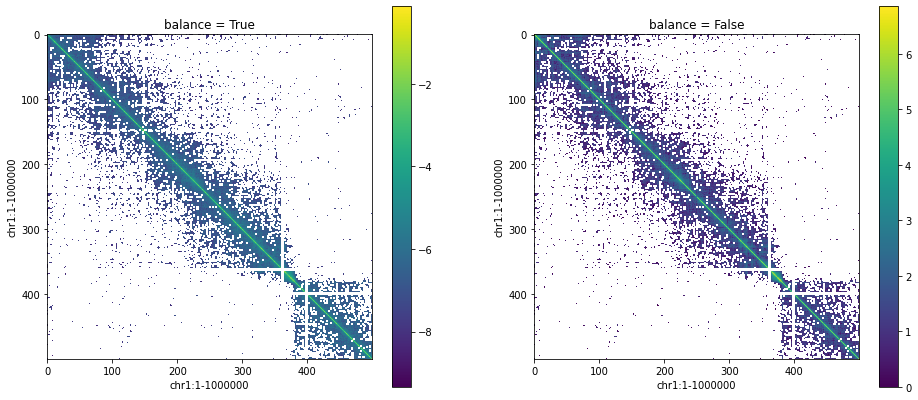

In [ ]:
plt.figure(figsize=(16,7))
ax = plt.subplot(121)
plt.imshow(np.log(m))
plt.xlabel("chr1:1-1000000")
plt.ylabel("chr1:1-1000000")
plt.title('balance = True')
plt.colorbar()
plt.subplot(122, sharex=ax, sharey=ax)
plt.imshow(np.log(m_raw))
plt.xlabel("chr1:1-1000000")
plt.ylabel("chr1:1-1000000")
plt.title('balance = False')
plt.colorbar()

Part II: TADs and calling

2) Детекция границ с помощью метода insulation из инструмента cooltools. Для готовой Hi-C карты HiC_hESC_merged.hg38.mapq_30.10000.mcool (250kb) определите и визуализируйте границы. Получите таблицу с информацией о значении Insulation score и детектированными границами для трех вариантов окна (см ноутбук) и двух разрешений - 20000 и 40000. Визуализируйте границы вместе с картой предложенными в ноутбуке методами. Оцените разметку для перечисленных вариантов. Какую бы вы выбрали для дальнейшего анализа? Стоит ли, по вашему мнению, включать в финальную разметку слабые границы?

In [ ]:
!mv /content/HiC_PAO.bam /content/task1

In [ ]:
!mv /content/PAO.2000.cool /content/task1
!mv /content/PAO.dedup.stats /content/task1
!mv /content/PAO.dups.bam /content/task1
!mv /content/PAO.dups.pairs.gz /content/task1
!mv /content/PAO.nodups.bam /content/task1
!mv /content/PAO.nodups.pairs.gz /content/task1
!mv /content/PAO.pairs.gz /content/task1
!mv /content/PAO.sorted.pairs.gz /content/task1
!mv /content/PAO.unmapped.bam /content/task1
!mv /content/PAO.unmapped.pairs.gz /content/task1

In [ ]:
!mv /content/data_for_HiC_HSE/HiC_hESC_merged.hg38.mapq_30.10000.mcool /content

In [ ]:
%%bash
pip3 install mustache-hic

In [ ]:
#!pip install https://github.com/open2c/cooltools/archive/refs/heads/master.zip

In [ ]:
!conda install -c bioconda cooltools

In [ ]:
!pip install matplotlib==3.1.3

In [ ]:
import cooltools
from cooltools import insulation
import cooltools.lib.plotting
import numpy as np

ValueError: ignored

Boundaries calling

In [ ]:
resolution = 40000
clr = cooler.Cooler(f'{mcool}::resolutions/{resolution}')

In [ ]:
windows = [3*resolution, 5*resolution, 10*resolution]
insulation_table = insulation(clr, windows, verbose=True)

/usr/local/lib/python3.7/dist-packages/cooltools/api/insulation.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diag_pixels["balanced"] = transform(diag_pixels)


In [ ]:
def pcolormesh_45deg(ax, matrix_c, start=0, resolution=1, *args, **kwargs):
    start_pos_vector = [start+resolution*i for i in range(len(matrix_c)+1)]
    import itertools
    n = matrix_c.shape[0]
    t = np.array([[1, 0.5], [-1, 0.5]])
    matrix_a = np.dot(np.array([(i[1], i[0])
                                for i in itertools.product(start_pos_vector[::-1],
                                                           start_pos_vector)]), t)
    x = matrix_a[:, 1].reshape(n + 1, n + 1)
    y = matrix_a[:, 0].reshape(n + 1, n + 1)
    im = ax.pcolormesh(x, y, np.flipud(matrix_c), *args, **kwargs)
    im.set_rasterized(True)
    return im

from matplotlib.ticker import EngFormatter
bp_formatter = EngFormatter('b')
def format_ticks(ax, x=True, y=True, rotate=True):
    if y:
        ax.yaxis.set_major_formatter(bp_formatter)
    if x:
        ax.xaxis.set_major_formatter(bp_formatter)
        ax.xaxis.tick_bottom()
    if rotate:
        ax.tick_params(axis='x',rotation=45)


(13500000.0, 19500000.0)

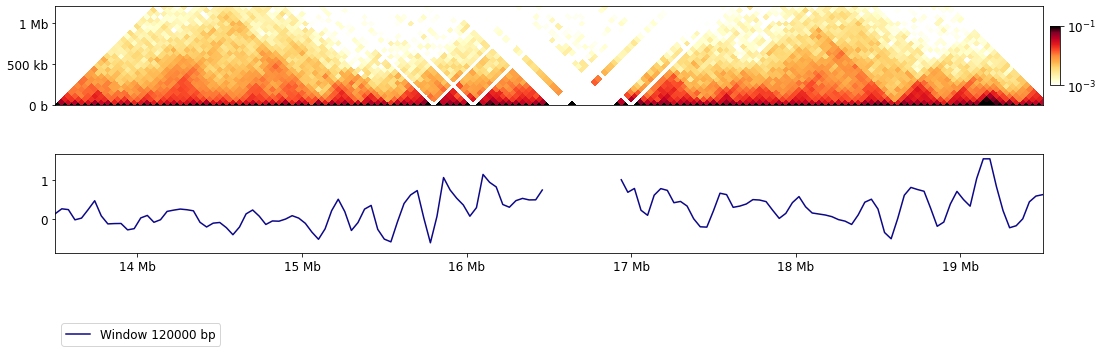

In [ ]:

plt.rcParams['font.size'] = 12

start = 13_500_000
end = start+ 50*windows[0]
region = ('chr1', start, end)
norm = LogNorm(vmax=0.1, vmin=0.001)
data = clr.matrix(balance=True).fetch(region)
f, ax = plt.subplots(figsize=(18, 6))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[0])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)
ins_ax.set_prop_cycle(plt.cycler("color", plt.cm.plasma(np.linspace(0,1,5))))
ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region['log2_insulation_score_'+str(windows[0])],
            label=f'Window {windows[0]} bp')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

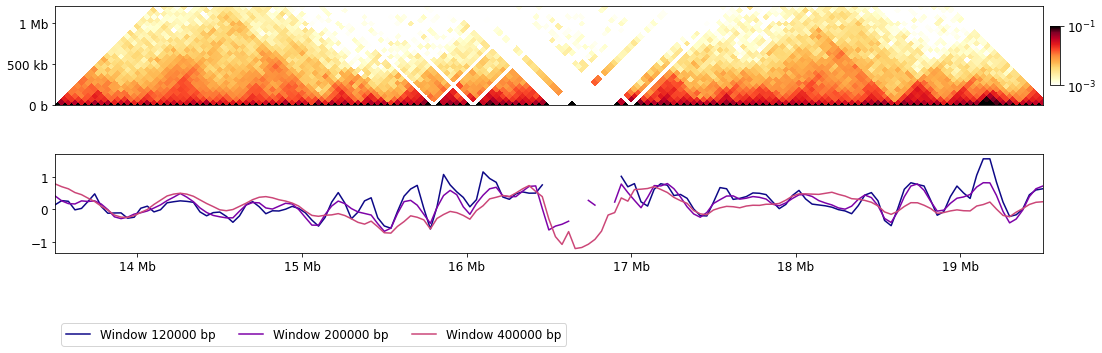

In [ ]:
for res in windows[1:]:
    ins_ax.plot(insul_region[['start', 'end']].mean(axis=1), insul_region[f'log2_insulation_score_{res}'], label=f'Window {res} bp')
ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);
f

(13500000.0, 19500000.0)

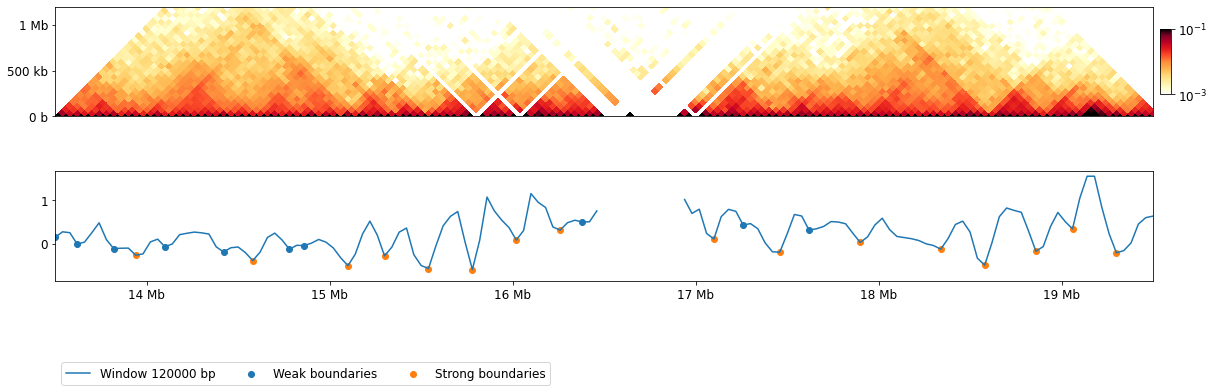

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
im = pcolormesh_45deg(ax, data, start=region[1], resolution=resolution, norm=norm, cmap='fall')
ax.set_aspect(0.5)
ax.set_ylim(0, 10*windows[0])
format_ticks(ax, rotate=False)
ax.xaxis.set_visible(False)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1%", pad=0.1, aspect=6)
plt.colorbar(im, cax=cax)

insul_region = bioframe.select(insulation_table, region)

ins_ax = divider.append_axes("bottom", size="50%", pad=0., sharex=ax)

ins_ax.plot(insul_region[['start', 'end']].mean(axis=1),
            insul_region[f'log2_insulation_score_{windows[0]}'], label=f'Window {windows[0]} bp')

boundaries = insul_region[~np.isnan(insul_region[f'boundary_strength_{windows[0]}'])]
weak_boundaries = boundaries[~boundaries[f'is_boundary_{windows[0]}']]
strong_boundaries = boundaries[boundaries[f'is_boundary_{windows[0]}']]
ins_ax.scatter(weak_boundaries[['start', 'end']].mean(axis=1),
            weak_boundaries[f'log2_insulation_score_{windows[0]}'], label='Weak boundaries')
ins_ax.scatter(strong_boundaries[['start', 'end']].mean(axis=1),
            strong_boundaries[f'log2_insulation_score_{windows[0]}'], label='Strong boundaries')

ins_ax.legend(bbox_to_anchor=(0., -1), loc='lower left', ncol=4);

format_ticks(ins_ax, y=False, rotate=False)
ax.set_xlim(region[1], region[2])

PART III: loops calling

In [ ]:
resolution = 20000
clr = cooler.Cooler(f'{mcool}::resolutions/{resolution}')

In [ ]:
hg38_chromsizes = bioframe.fetch_chromsizes('hg38')
hg38_cens = bioframe.fetch_centromeres('hg38')
hg38_arms = bioframe.make_chromarms(hg38_chromsizes, hg38_cens)

# Select only chromosomes that are present in the cooler.
hg38_arms = hg38_arms.set_index("chrom").loc[['chr1']].reset_index()

# intra-arm expected
expected = cooltools.expected_cis(
    clr,
    view_df=hg38_arms,
    nproc=4,
)

In [ ]:
dots_df = cooltools.dots(
    clr,
    expected=expected,
    view_df=hg38_arms,
    # how far from the main diagonal to call dots:
    max_loci_separation=10_000_000,
    nproc=4,
)

In [ ]:
! mustache -f '/content/drive/MyDrive/data_for_HiC_HSE/HiC_hESC_merged.hg38.mapq_30.10000.mcool' -ch chr1 -r 20kb -pt 0.05 -o cooler_mustache_dots.tsv




The distance limit is set to 4000000bp
Reading contact map...
0 40000000
36000000 76000000
72000000 112000000
108000000 148000000
144000000 184000000
180000000 220000000
216000000 248956421
Normalizing contact map...
Loop calling...
Starting block 1/7...
Starting block 2/7...
Starting block 3/7...
Starting block 4/7...
Block 4 done.
Block 3 done.
Block 1 done.
Block 2 done.
Starting block 5/7...
Starting block 6/7...
Starting block 7/7...
Block 6 done.
Block 5 done.
Block 7 done.
77 loops found for chrmosome=chr1, fdr<0.05 in 85.17sec


PART IV: compartment calling

In [ ]:
import seaborn as sns
import pandas as pd

In [ ]:
resolution = 250000
clr = cooler.Cooler(f'{mcool}::resolutions/{resolution}')

In [ ]:
bins = clr.bins()[:]
hg38_genome = bioframe.load_fasta('/content/drive/MyDrive/data_for_HiC_HSE//hg38.fa');
## note the next command may require installing pysam
gc_cov = bioframe.frac_gc(bins[['chrom', 'start', 'end']], hg38_genome)
display(gc_cov)

,chrom,start,end,GC
0,chr1,0,250000,0.443708
1,chr1,250000,500000,0.418652
2,chr1,500000,750000,0.433950
3,chr1,750000,1000000,0.513908
4,chr1,1000000,1250000,0.617632
...,...,...,...,...
12362,chrY,56250000,56500000,NaN
12363,chrY,56500000,56750000,0.389225
12364,chrY,56750000,57000000,0.392710
12365,chrY,57000000,57227415,0.420275


In [ ]:
view_df = pd.DataFrame({'chrom': ['chr3'],
                        'start': 0,
                        'end': [clr.chromsizes.values[2]],
                        'name': ['chr3']}
                      )
display(view_df)

,chrom,start,end,name
0,chr3,0,198295559,chr3


In [ ]:
cis_eigs = cooltools.eigs_cis(
                        clr,
                        gc_cov,
                        view_df=view_df,
                        n_eigs=3,
                        )

# cis_eigs[0] returns eigenvalues, here we focus on eigenvectors
eigenvector_track = cis_eigs[1][['chrom','start','end','E1']]

In [ ]:
N_GROUPS=30
    
cvd = cooltools.expected_cis(
        clr=clr,view_df=view_df
)

interaction_sum, interaction_count =  cooltools.saddle(
        clr,
        cvd,
        eigenvector_track,
        'cis',
        n_bins=N_GROUPS,
        qrange=(0.01,0.99),
        view_df=view_df
)
saddle=np.log2(interaction_sum / interaction_count)### visualize the matrix to look at the saddle plot
